In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events_ttbar = uproot.open("../data/user.khanov.mc15_14TeV.600012.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.r12573_mc_trk_Akt4EMTo/user.khanov.37100851.Akt4EMTo._000001.root:bTag_AntiKt4EMTopoJets")
events_ZZ4nu = uproot.open("../data/user.khanov.mc15.mc15_14TeV.600026.PhH7EG_NNPDF3_AZNLO_VBFH125_ZZ4nu_MET75.r13618_mc_trk_Akt4EMTo/user.khanov.37100685.Akt4EMTo._000001.root:bTag_AntiKt4EMTopoJets")

In [3]:
#events.keys()
#events.values()

In [4]:
jet_pt = events_ttbar["jet_pt_orig"].array(library='ak')
jet_eta = events_ttbar["jet_eta"].array(library='ak')
jet_phi = events_ttbar["jet_phi"].array(library='ak')
trk_pt = events_ttbar["trk_pt"].array(library='ak')
trk_eta = events_ttbar["trk_eta"].array(library='ak')
trk_phi = events_ttbar["trk_phi"].array(library='ak')

jet_trkAssoc_index = events_ttbar["jet_trackAssoc_index"].array(library='ak')

print(jet_trkAssoc_index)
print(trk_pt)

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ..., [...]], ...]
[[2.37e+04, 1.56e+04, 5.76e+03, 1.58e+04, ..., 596, 1.29e+03, 2.1e+03], ...]


In [5]:
#events = len(jet_pt)
events = 100

delta_R = []
pt_ratio = []
num_trks = []

for i in range(events):
    for j in range(len(jet_pt[i])):
        sum_pt = 0
        
        jpt = jet_pt[i][j]
        jeta = jet_eta[i][j]
        jphi = jet_phi[i][j]
        
        num_trk = len(jet_trkAssoc_index[i][j])
        if num_trk == 0:
             continue
        num_trks.append(num_trk)
        for k in range(num_trk):
            jtr = jet_trkAssoc_index[i][j][k]
            tpt = trk_pt[i][jtr]
            teta = trk_eta[i][jtr]
            tphi = trk_phi[i][jtr]
            
            sum_pt+=tpt
            
            dR = np.sqrt((jeta-teta)**2+(jphi-tphi)**2)
            if dR>5:
                delta_R.append(abs(dR-6.28))
            else:
                delta_R.append(dR)
        pt_ratio.append(sum_pt/jpt)

58966


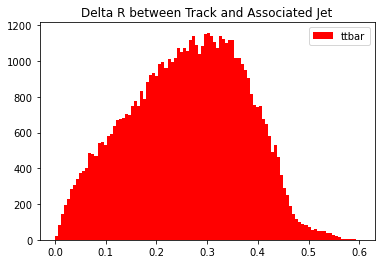

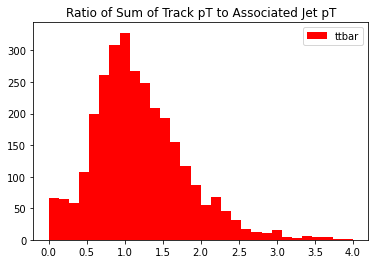

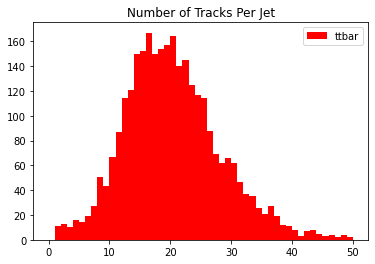

In [6]:
print(len(delta_R))
plt.hist(delta_R, bins=100,range=(0,0.6),color='red')
plt.title("Delta R between Track and Associated Jet")
plt.legend(["ttbar"])
plt.show()
plt.hist(pt_ratio, bins=30,range=(0,4),color='red')
plt.title("Ratio of Sum of Track pT to Associated Jet pT")
plt.legend(["ttbar"])
plt.show()
plt.hist(num_trks, bins=50,color='red',range=(0,50))
plt.title("Number of Tracks Per Jet")
plt.legend(["ttbar"])
plt.show()

In [7]:
jet_pt = events_ZZ4nu["jet_pt_orig"].array(library='ak')
jet_eta = events_ZZ4nu["jet_eta"].array(library='ak')
jet_phi = events_ZZ4nu["jet_phi"].array(library='ak')
trk_pt = events_ZZ4nu["trk_pt"].array(library='ak')
trk_eta = events_ZZ4nu["trk_eta"].array(library='ak')
trk_phi = events_ZZ4nu["trk_phi"].array(library='ak')

jet_trkAssoc_index = events_ZZ4nu["jet_trackAssoc_index"].array(library='ak')

print(jet_trkAssoc_index)
print(trk_pt)

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, ..., 14, 15, 16, 17, 18, 19, 20, 21], ...], ...]
[[1.54e+03, 1.22e+03, 1.49e+03, 1.12e+03, ..., 935, 1.64e+03, 1.64e+03], ...]


In [8]:
#events = len(jet_pt)
events = 100

delta_R = []
pt_ratio = []
num_trks = []

for i in range(events):
    for j in range(len(jet_pt[i])):
        sum_pt = 0
        
        jpt = jet_pt[i][j]
        jeta = jet_eta[i][j]
        jphi = jet_phi[i][j]
        
        num_trk = len(jet_trkAssoc_index[i][j])
        if num_trk == 0:
             continue
        num_trks.append(num_trk)
        for k in range(num_trk):
            jtr = jet_trkAssoc_index[i][j][k]
            tpt = trk_pt[i][jtr]
            teta = trk_eta[i][jtr]
            tphi = trk_phi[i][jtr]
            
            sum_pt+=tpt
            
            dR = np.sqrt((jeta-teta)**2+(jphi-tphi)**2)
            if dR>5:
                delta_R.append(abs(dR-6.28))
            else:
                delta_R.append(dR)
        pt_ratio.append(sum_pt/jpt)

64168


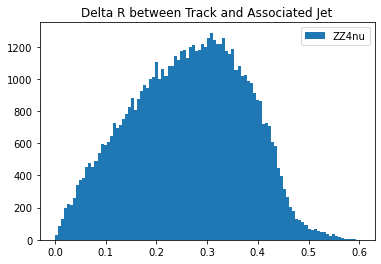

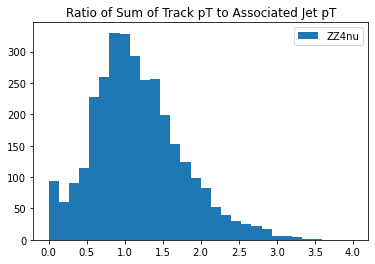

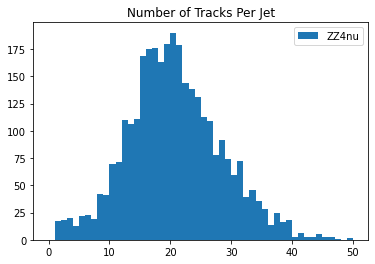

In [9]:
print(len(delta_R))
plt.hist(delta_R, bins=100,range=(0,0.6))
plt.title("Delta R between Track and Associated Jet")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(pt_ratio, bins=30,range=(0,4))
plt.title("Ratio of Sum of Track pT to Associated Jet pT")
plt.legend(["ZZ4nu"])
plt.show()
plt.hist(num_trks, bins=50,range=(0,50))
plt.title("Number of Tracks Per Jet")
plt.legend(["ZZ4nu"])
plt.show()